In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
data = pd.read_csv("obesity_child_age.csv")

In [71]:
data

,index,Time,Age,Gender,PercentObese,SE
0,0,"[1971,1974]","[2,5]",All,5.0,-0.6
1,1,"[1976,1980]","[2,5]",All,5.0,-0.6
2,2,"[1988,1994]","[2,5]",All,7.2,-0.7
3,3,"[1999,2000]","[2,5]",All,10.3,-1.7
4,4,"[2001,2002]","[2,5]",All,10.6,-1.8
...,...,...,...,...,...,...
94,94,"[2005,2006]","[12,19]",F,17.3,-2.1
95,95,"[2007,2008]","[12,19]",F,16.8,-2.0
96,96,"[2009,2010]","[12,19]",F,17.1,-1.3
97,97,"[2011,2012]","[12,19]",F,20.7,-2.0


In [72]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         99 non-null     int64  
 1   Time          99 non-null     object 
 2   Age           99 non-null     object 
 3   Gender        99 non-null     object 
 4   PercentObese  99 non-null     float64
 5   SE            99 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 4.8+ KB


In [73]:
from sklearn.preprocessing import StandardScaler
# data['Time'] = data['Time'].apply(lambda x: [int(year) for year in x.strip('[]').split(',')])
# data['StartYear'] = data['Time'].apply(lambda x: x[0])
# data['EndYear'] = data['Time'].apply(lambda x: x[1])
# data.drop('Time', axis=1, inplace=True)

data['StartYear'] = data['Time'].apply(lambda x: int(x.strip('[]').split(',')[0]))
data['EndYear'] = data['Time'].apply(lambda x: int(x.strip('[]').split(',')[1]))


# 1. Convert string representations of age ranges to separate minimum and maximum ages
data['Age'] = data['Age'].apply(lambda x: [int(age) for age in x.strip('[]').split(',')])

# Extract minimum and maximum ages from the list
data['MinAge'] = data['Age'].apply(lambda x: x[0])
data['MaxAge'] = data['Age'].apply(lambda x: x[1])
data.drop('Age', axis=1, inplace=True)

# 3. Standardize the continuous-valued features 'Age' and 'PercentObese'
continuous_features = ['PercentObese', 'MinAge', 'MaxAge']
scaler = StandardScaler()
data[continuous_features] = scaler.fit_transform(data[continuous_features])


In [74]:
data

,index,Time,Gender,PercentObese,SE,StartYear,EndYear,MinAge,MaxAge
0,0,"[1971,1974]",All,-1.543212,-0.6,1971,1974,-1.135550,-1.162476
1,1,"[1976,1980]",All,-1.543212,-0.6,1976,1980,-1.135550,-1.162476
2,2,"[1988,1994]",All,-1.117053,-0.7,1988,1994,-1.135550,-1.162476
3,3,"[1999,2000]",All,-0.516556,-1.7,1999,2000,-1.135550,-1.162476
4,4,"[2001,2002]",All,-0.458444,-1.8,2001,2002,-1.135550,-1.162476
...,...,...,...,...,...,...,...,...,...
94,94,"[2005,2006]",F,0.839404,-2.1,2005,2006,1.297771,1.278724
95,95,"[2007,2008]",F,0.742550,-2.0,2007,2008,1.297771,1.278724
96,96,"[2009,2010]",F,0.800662,-1.3,2009,2010,1.297771,1.278724
97,97,"[2011,2012]",F,1.498013,-2.0,2011,2012,1.297771,1.278724


In [75]:
from sklearn.model_selection import train_test_split

X=data.drop(['PercentObese','SE','index'],axis=1)
Y=data['PercentObese']


In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)
train_data = X_train.join(Y_train)
train_data

,Time,Gender,StartYear,EndYear,MinAge,MaxAge,PercentObese
95,"[2007,2008]",F,2007,2008,1.297771,1.278724,0.742550
49,"[2003,2004]",M,2003,2004,-0.162221,-0.116248,1.343046
52,"[2009,2010]",M,2009,2010,-0.162221,-0.116248,1.381788
90,"[1988,1994]",F,1988,1994,1.297771,1.278724,-0.632781
93,"[2003,2004]",F,2003,2004,1.297771,1.278724,0.665066
...,...,...,...,...,...,...,...
16,"[2003,2004]",All,2003,2004,-0.162221,-0.116248,1.129967
88,"[1971,1974]",F,1971,1974,1.297771,1.278724,-1.310762
21,"[2013,2014]",All,2013,2014,-0.162221,-0.116248,0.858775
62,"[2007,2008]",M,2007,2008,1.297771,1.278724,1.226821


array([[<Axes: title={'center': 'StartYear'}>,
        <Axes: title={'center': 'EndYear'}>],
       [<Axes: title={'center': 'MinAge'}>,
        <Axes: title={'center': 'MaxAge'}>],
       [<Axes: title={'center': 'PercentObese'}>, <Axes: >]], dtype=object)

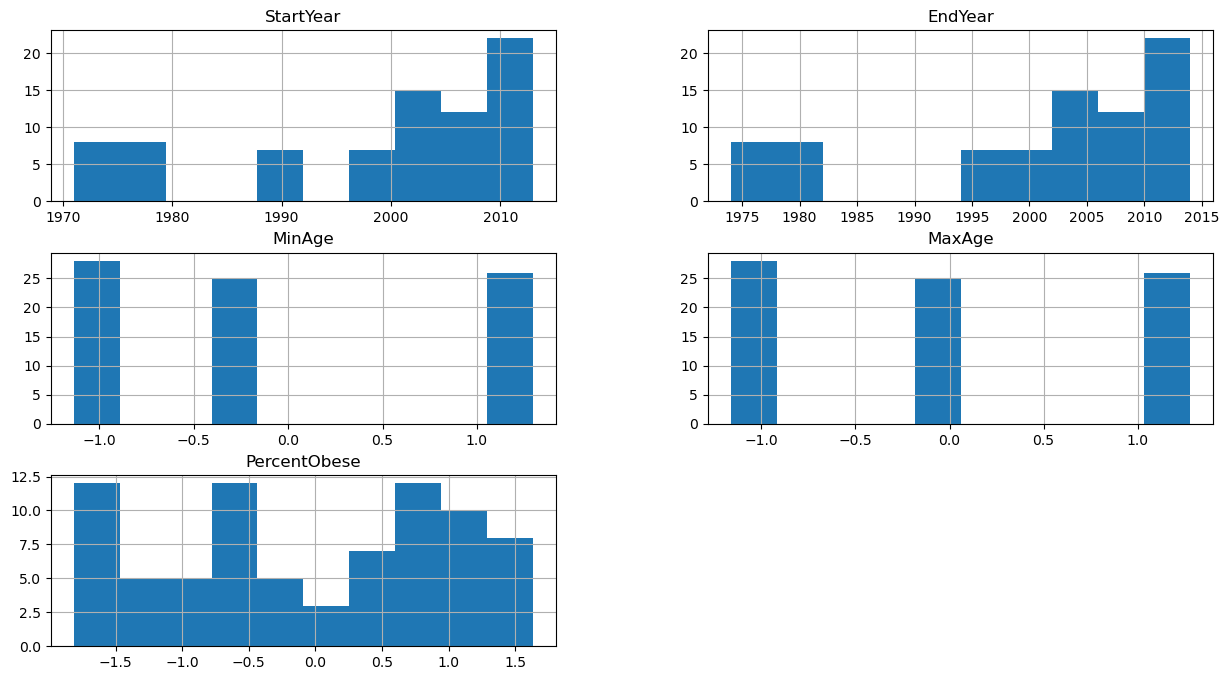

In [77]:
train_data.hist(figsize=(15,8))